In [87]:
import numpy as np
import random
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')


In [88]:
a = u1, u2 = (19, 41) # A
t = v1, v2 = (86, 91) # T
s = w1, w2 = (45, 75) # S

Define your Diff function in python.

In [89]:
def dist(x, u):
    """Calculates euclidean distance between two points""" 
    x1, x2 = x
    u1, u2 = u
    return np.log(3 + 3 * (x1 - u1) ** 2 + 1.5 * (x2 - u2) ** 2)

Check that the distance between a vector and itself is log(3). Check that the distance between your three vectors is non-zero.

In [90]:
assert (dist(a, a) == np.log(3) 
        and dist(a, t) != 0
        and dist(a, s) != 0 
        and dist(t, s) != 0)

In [91]:
def diff(x, u, v, w):
    """Calculates difference between the distances of x from u and v"""	
    return dist(u, x) + dist(v, x)+ dist(w,x)

Compute Diff(x) for 20 random points. What is the average value of Diff? What is the lowest and highest value you found? Is random search a good way to minimize this function?

In [92]:
random_points = np.random.uniform(0, 100, (20, 2))
differences = np.apply_along_axis(diff, 1, random_points, a, t, s)

In [93]:
# calculate average value of differences
np.mean(differences)

24.890300512370143

In [94]:
# calculate lowest value of differences
np.amin(differences)

21.100003886753477

In [95]:
# calculate highest value of differences
np.amax(differences)

27.770400352019735

Set xzero=(50,50). Compute Diff(x)=Diff(50,50).


In [96]:
xzero = np.array([50, 50])
diff(xzero, a, t, s)

23.6980053183483

Create a function to compute and print the gradient of Diff by using a small delta=0.001.


In [97]:
def gradient(x, u, v, w, delta=0.001):
    """Calculates gradient of the difference function at point x""" 
    old = diff(x, u, v, w)
    new = diff(x+delta, u, v, w)
    gradient = (new - old) / delta                          # dit klopt niet! gradient moet een numpy array zijn van 2 elementen ipv een float
    return gradient

In [98]:
gradient(xzero, a, t, s)

[50 50]


-0.026353958322289373

Use this function to print the gradient at (0,0), (100,0), (0,100) and (100,100). Based on these values, is it likely that the minimum of the function is inside this area? And the maximum?

In [99]:
p1 = np.array([0, 0])
p2 = np.array([100, 0])
p3 = np.array([0, 100])

In [100]:
gradient(p1, a, t, s)  

[0 0]


-0.1225944882321528

In [101]:
gradient(p2, a, t, s) 

[100   0]


0.007816572178853676

In [102]:
gradient(p3, a, t, s)  

[  0 100]


-0.03972257223594511

Define xzero=(50,50) and stepsize=1.0. Make a function to compute xnext by taking e a small step into the opposite direction of the gradient, so that diff decreases. E.g. if the gradient is (0.4,0.6), do xnext=(oldx1-0.4*stepsize,oldx2-0.6*stepsize).

Repeat this multiple times (make a function to do this automatically) and print x and Diff(x) at each step. You may need to adjust stepsize if you overshoot or are not moving at all. Try to reach a local minimum.

In [103]:
xzero = np.array([50, 50])

In [125]:
def gradient_descent(x, u, v, w, delta=1, num_iteration=10000):
    """Performs gradient descent on the difference function"""
    x_new = x
    
    for i in range(num_iteration):
        x_old = x_new
        x_new = x_old - delta * gradient(x_old, u, v, w)                                # eigenlijk moet gradient een numpy array teruggeven van 2 elementen
                                                                                        # dan geldt: x_new = [(x_old[0] - delta * gradient[0]), (x_old[1] - delta * gradient[1])]
        # make stepsize smaller if the new point is not better than the old point
        if diff(x_new, a, t, s) > diff(x_old, a, t, s):        
            delta = delta * 0.5
            
        # stop if the stepsize is too small
        if delta < 0.0001:
            break	
        
        print(x_new)
        print(diff(x_new, a, t, s))
        
    return x_new

In [126]:
gradient_descent(xzero, a, t, s)

[50 50]
[50 50]
[50.02635396 50.02635396]
23.69731195437437
[50.02635396 50.02635396]
[50.05261573 50.05261573]
23.696623441445798
[50.05261573 50.05261573]
[50.07878494 50.07878494]
23.695939781835637
[50.07878494 50.07878494]
[50.10486122 50.10486122]
23.695260977110348
[50.10486122 50.10486122]
[50.13084424 50.13084424]
23.694587028136603
[50.13084424 50.13084424]
[50.15673363 50.15673363]
23.69391793508869
[50.15673363 50.15673363]
[50.18252908 50.18252908]
23.693253697456207
[50.18252908 50.18252908]
[50.20823025 50.20823025]
23.692594314050623
[50.20823025 50.20823025]
[50.23383683 50.23383683]
23.691939783014238
[50.23383683 50.23383683]
[50.25934852 50.25934852]
23.69129010182734
[50.25934852 50.25934852]
[50.28476503 50.28476503]
23.69064526731637
[50.28476503 50.28476503]
[50.31008606 50.31008606]
23.69000527566212
[50.31008606 50.31008606]
[50.33531134 50.33531134]
23.68937012240826
[50.33531134 50.33531134]
[50.36044061 50.36044061]
23.68873980246948
[50.36044061 50.3604406

array([54.87919384, 54.87919384])

Repeat step 7 with starting points (0,0) and (100,100). Do you always end up at the same point?

In [106]:
x_start = np.array([0, 0])
gradient_descent(x_start, a, t, s)

[0 0]
[0.12259449 0.12259449]
28.21066378714577
[0.12259449 0.12259449]
[0.24551137 0.24551137]
28.195535449889366
[0.24551137 0.24551137]
[0.36875295 0.36875295]
28.180326987729067
[0.36875295 0.36875295]
[0.49232158 0.49232158]
28.165037609244926
[0.49232158 0.49232158]
[0.61621962 0.61621962]
28.14966651311193
[0.61621962 0.61621962]
[0.74044944 0.74044944]
28.13421288799967
[0.74044944 0.74044944]
[0.86501346 0.86501346]
28.118675912475155
[0.86501346 0.86501346]
[0.9899141 0.9899141]
28.103054754900338
[0.9899141 0.9899141]
[1.11515379 1.11515379]
28.08734857334281
[1.11515379 1.11515379]
[1.24073502 1.24073502]
28.07155651548249
[1.24073502 1.24073502]
[1.36666027 1.36666027]
28.05567771852435
[1.36666027 1.36666027]
[1.49293205 1.49293205]
28.03971130911146
[1.49293205 1.49293205]
[1.61955289 1.61955289]
28.023656403243134
[1.61955289 1.61955289]
[1.74652535 1.74652535]
28.007512106200682
[1.74652535 1.74652535]
[1.873852 1.873852]
27.991277512473786
[1.873852 1.873852]
[2.00153

array([54.87919385, 54.87919385])

In [107]:
x_start = np.array([100, 100])
gradient_descent(x_start, a, t, s)

[100 100]
[99.77716108 99.77716108]
25.85361568683651
[99.77716108 99.77716108]
[99.55144466 99.55144466]
25.802328974691843
[99.55144466 99.55144466]
[99.3227241 99.3227241]
25.74965707220224
[99.3227241 99.3227241]
[99.09086325 99.09086325]
25.695516983595788
[99.09086325 99.09086325]
[98.85571549 98.85571549]
25.63981799097167
[98.85571549 98.85571549]
[98.61712259 98.61712259]
25.582460679864003
[98.61712259 98.61712259]
[98.37491342 98.37491342]
25.523335809754002
[98.37491342 98.37491342]
[98.12890248 98.12890248]
25.46232299991999
[98.12890248 98.12890248]
[97.87888821 97.87888821]
25.399289194459435
[97.87888821 97.87888821]
[97.62465108 97.62465108]
25.334086862249464
[97.62465108 97.62465108]
[97.36595135 97.36595135]
25.2665518774744
[97.36595135 97.36595135]
[97.10252653 97.10252653]
25.196501013811073
[97.10252653 97.10252653]
[96.83408836 96.83408836]
25.123728969775826
[96.83408836 96.83408836]
[96.56031944 96.56031944]
25.04800482343088
[96.56031944 96.56031944]
[96.280

array([87.40330943, 87.40330943])

Make the nicest possible chart using mathplotlib that shows what the Diff function looks like.

[[34.76151722 34.75653743 34.75155626 ... 34.87298468 34.87771852
  34.88245134]
 [34.75866143 34.75367677 34.74869071 ... 34.870199   34.87493715
  34.8796743 ]
 [34.75580635 34.75081681 34.74582586 ... 34.86741381 34.8721563
  34.87689777]
 ...
 [34.36376967 34.35813122 34.35248991 ... 34.21067316 34.21664848
  34.22262013]
 [34.36635723 34.36072363 34.35508718 ... 34.2133217  34.21929156
  34.22525777]
 [34.36894622 34.36331747 34.35768588 ... 34.21597206 34.22193647
  34.22789723]]


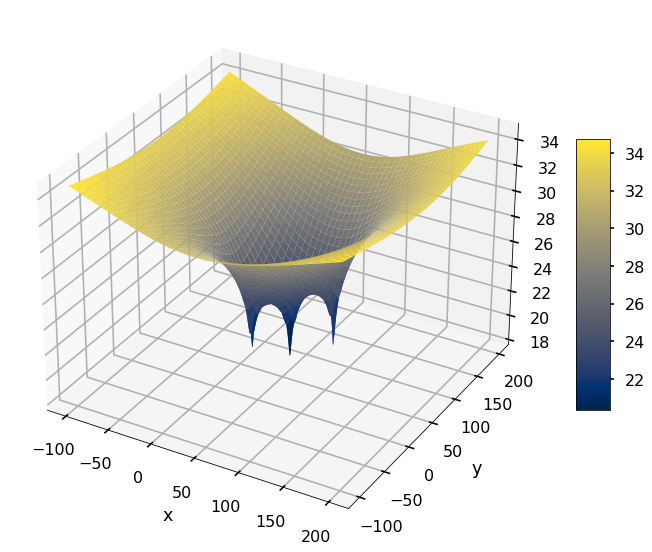

In [123]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(-100, 200, 0.2)
y = np.arange(-100, 200, 0.2)

X, Y = np.meshgrid(x, y)
Z = diff((X, Y), a, t, s)
print(Z)
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

Show the gradient field as well in a chart. Use a new plot or add the gradient to the original plot.

[-100. -100.]
[-99.8 -99.8]
[-99.6 -99.6]
[-99.4 -99.4]
[-99.2 -99.2]
[-99. -99.]
[-98.8 -98.8]
[-98.6 -98.6]
[-98.4 -98.4]
[-98.2 -98.2]
[-98. -98.]
[-97.8 -97.8]
[-97.6 -97.6]
[-97.4 -97.4]
[-97.2 -97.2]
[-97. -97.]
[-96.8 -96.8]
[-96.6 -96.6]
[-96.4 -96.4]
[-96.2 -96.2]
[-96. -96.]
[-95.8 -95.8]
[-95.6 -95.6]
[-95.4 -95.4]
[-95.2 -95.2]
[-95. -95.]
[-94.8 -94.8]
[-94.6 -94.6]
[-94.4 -94.4]
[-94.2 -94.2]
[-94. -94.]
[-93.8 -93.8]
[-93.6 -93.6]
[-93.4 -93.4]
[-93.2 -93.2]
[-93. -93.]
[-92.8 -92.8]
[-92.6 -92.6]
[-92.4 -92.4]
[-92.2 -92.2]
[-92. -92.]
[-91.8 -91.8]
[-91.6 -91.6]
[-91.4 -91.4]
[-91.2 -91.2]
[-91. -91.]
[-90.8 -90.8]
[-90.6 -90.6]
[-90.4 -90.4]
[-90.2 -90.2]
[-90. -90.]
[-89.8 -89.8]
[-89.6 -89.6]
[-89.4 -89.4]
[-89.2 -89.2]
[-89. -89.]
[-88.8 -88.8]
[-88.6 -88.6]
[-88.4 -88.4]
[-88.2 -88.2]
[-88. -88.]
[-87.8 -87.8]
[-87.6 -87.6]
[-87.4 -87.4]
[-87.2 -87.2]
[-87. -87.]
[-86.8 -86.8]
[-86.6 -86.6]
[-86.4 -86.4]
[-86.2 -86.2]
[-86. -86.]
[-85.8 -85.8]
[-85.6 -85.6]
[-85.4

ValueError: Argument Z must be 2-dimensional.

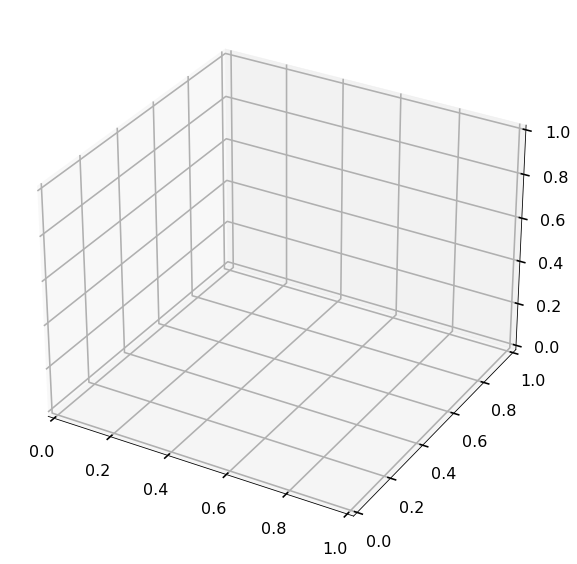

In [124]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

X = np.arange(-100, 200, 0.2)
Y = X
Z = np.empty_like(X)

for i, x in enumerate(X):
    point = np.array([x, x])
    z = gradient(point, a, t, s)	                                    # ook hier het probleem dat gradient geen numpy array teruggeeft van 2 elementen
    Z[i] = z                                                            # als dat eenmaal klopt zal de error 'Z must be 2-dimensional' verdwijnen 
print(Z)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()